In [2]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names




In [4]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)



In [5]:

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_std, y)



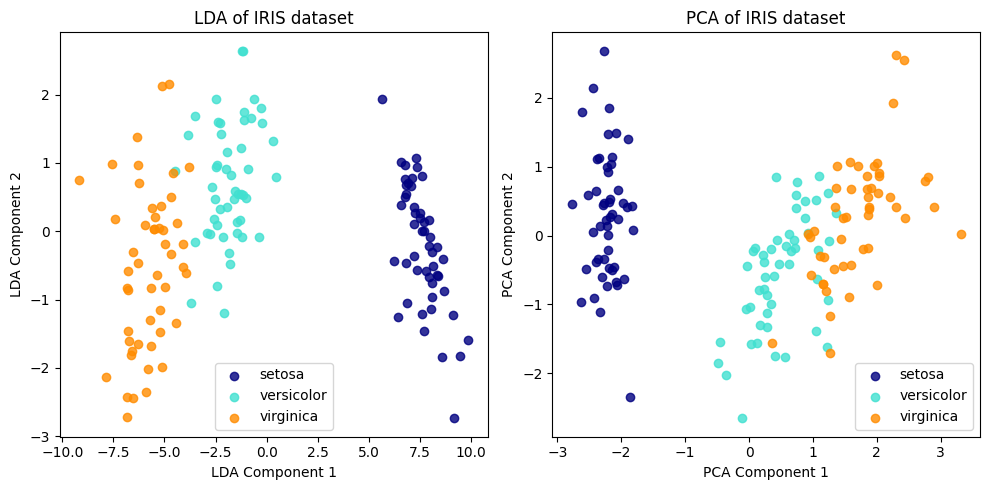

In [8]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of IRIS dataset')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.subplot(1, 2, 2)
for color, i, target_name in zip(['navy', 'turquoise', 'darkorange'], [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of IRIS dataset')

plt.tight_layout()
plt.show()




Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']
Shape of dataset: (178, 13)
Training set size: (124, 13)
Testing set size: (54, 13)
LDA Model Evaluation:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Logistic Regression Model Evaluation:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
Confusion Matrix:
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


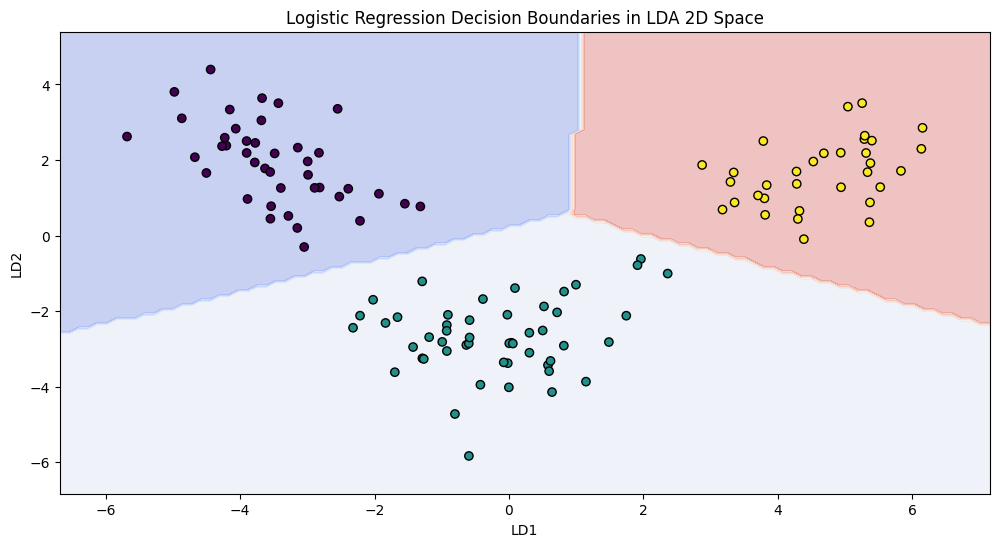

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt


wine = datasets.load_wine()
X = wine.data
y = wine.target


print("Features:", wine.feature_names)
print("Classes:", wine.target_names)
print("Shape of dataset:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
train_lda = lda.fit_transform(train_scaled, y_train)
test_lda = lda.transform(test_scaled)

logistic = LogisticRegression(max_iter=200)
logistic.fit(train_lda, y_train)

pred_lda = lda.predict(test_scaled)
accuracy_lda = accuracy_score(y_test, pred_lda)
precision_lda = precision_score(y_test, pred_lda, average='weighted')
recall_lda = recall_score(y_test, pred_lda, average='weighted')
confusion_lda = confusion_matrix(y_test, pred_lda)

print("LDA Model Evaluation:")
print(f"Accuracy: {accuracy_lda:.2f}")
print(f"Precision: {precision_lda:.2f}")
print(f"Recall: {recall_lda:.2f}")
print("Confusion Matrix:")
print(confusion_lda)

pred_logistic = logistic.predict(test_lda)
accuracy_logistic = accuracy_score(y_test, pred_logistic)
precision_logistic = precision_score(y_test, pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, pred_logistic, average='weighted')
confusion_logistic = confusion_matrix(y_test, pred_logistic)

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_logistic:.2f}")
print(f"Precision: {precision_logistic:.2f}")
print(f"Recall: {recall_logistic:.2f}")
print("Confusion Matrix:")
print(confusion_logistic)

xx, yy = np.meshgrid(np.linspace(train_lda[:, 0].min() - 1, train_lda[:, 0].max() + 1, 100),
                     np.linspace(train_lda[:, 1].min() - 1, train_lda[:, 1].max() + 1, 100))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = logistic.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(train_lda[:, 0], train_lda[:, 1], c=y_train, edgecolor='k', marker='o')
plt.title('Logistic Regression Decision Boundaries in LDA 2D Space')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()
